In [246]:
# dataset: https://www.kaggle.com/START-UMD/gtd  

In [274]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation, rc
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from IPython.display import HTML, display

import folium
import folium.plugins

ModuleNotFoundError: No module named 'rc'

In [165]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',  encoding='ISO-8859-1')
print(df.head())  
pd.options.display.max_rows = 4000

/Users/manu/Desktop/Python/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [166]:
df.rename(columns={'iyear':'year', 'imonth': 'month', 'iday': 'day', 'country': 'country_code', 'country_txt':'Country', 'region': 'Regioncode', 'region_txt': 'Region', 
'target1': 'Target', 'nperpsThe': 'NoofTerrorist', 'gname': 'Group', 'group': 'moredetails', 'weaptype1_txt': 'weapon_type',
                  'weapsubtype1_txt': 'moreweapon_details', 'nkill': 'totaldied', 'nkillus':'US_peaple_died', 'targtype1_txt':'Target_type', 'nwound':'wounded', 'attacktype1_txt': 'attacktype'}, inplace= True)






In [167]:
print(df.isnull().sum())

eventid                    0
year                       0
month                      0
day                        0
approxdate            172452
extended                   0
resolution            179471
country_code               0
Country                    0
Regioncode                 0
Region                     0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype                 0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [169]:
df = df[['year', 'month', 'day', 'Country', 'country_code', 'latitude', 'longitude', 'city', 'success', 'suicide', 'totaldied', 'wounded', 'Target', 'summary','Group', 'weapon_type', 'motive' , 'Target_type', 'attacktype', 'Region']]
df['casuality'] = df['totaldied']+ df['wounded']
df.columns
        


Index(['year', 'month', 'day', 'Country', 'country_code', 'latitude',
       'longitude', 'city', 'success', 'suicide', 'totaldied', 'wounded',
       'Target', 'summary', 'Group', 'weapon_type', 'motive', 'Target_type',
       'attacktype', 'Region', 'casuality'],
      dtype='object')

Text(0.5, 1.0, 'No of Attack in Year')

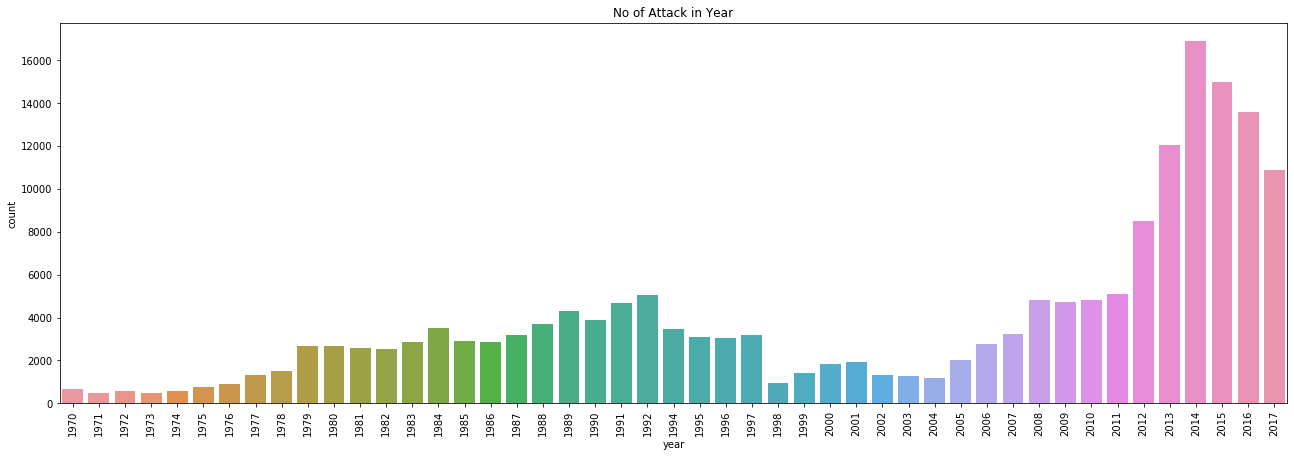

In [152]:

plt.figure(figsize = (22, 7))
sns.countplot('year', data = df)
plt.xticks(rotation = 90)
plt.title('No of Attack in Year')


Text(0.5, 1.0, 'Attack Type')

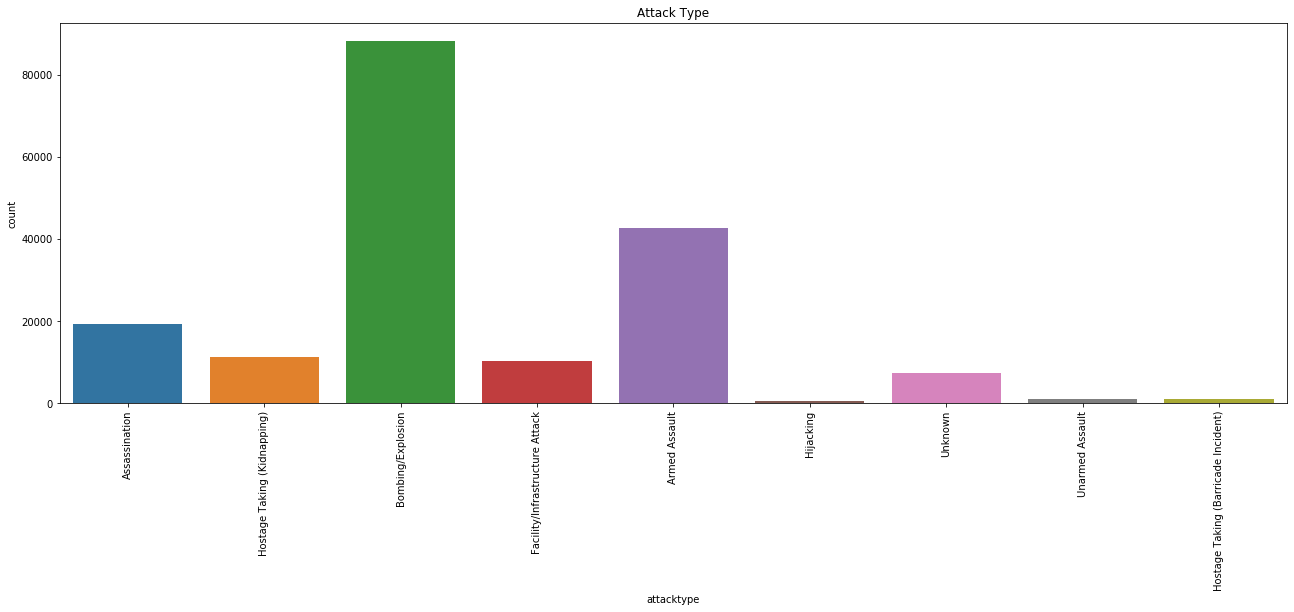

In [162]:

plt.figure(figsize = (22, 7))
sns.countplot('attacktype', data = df)
plt.xticks(rotation = 90)
plt.title('Attack Type')


Text(0.5, 1.0, 'Attack Type')

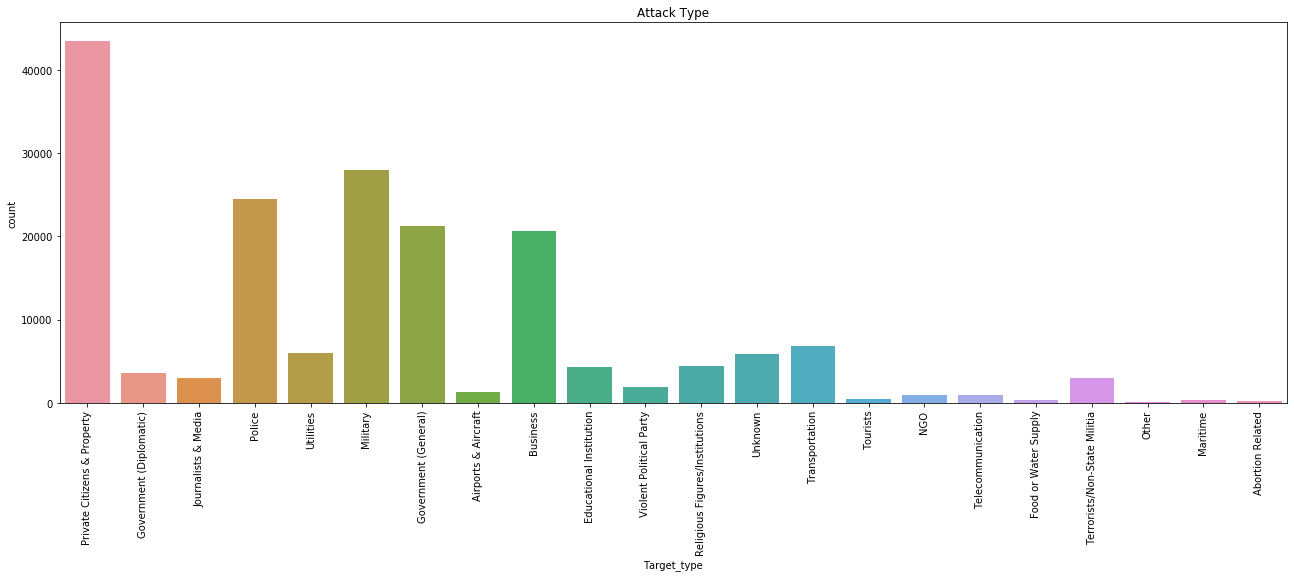

In [154]:

plt.figure(figsize = (22, 7))
sns.countplot('Target_type', data = df)
plt.xticks(rotation = 90)
plt.title('Target type')


In [206]:
df['Country'].value_counts()[:15].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria',
       'Thailand', 'Yemen', 'Spain'],
      dtype='object')

Text(0.5, 1.0, 'Country')

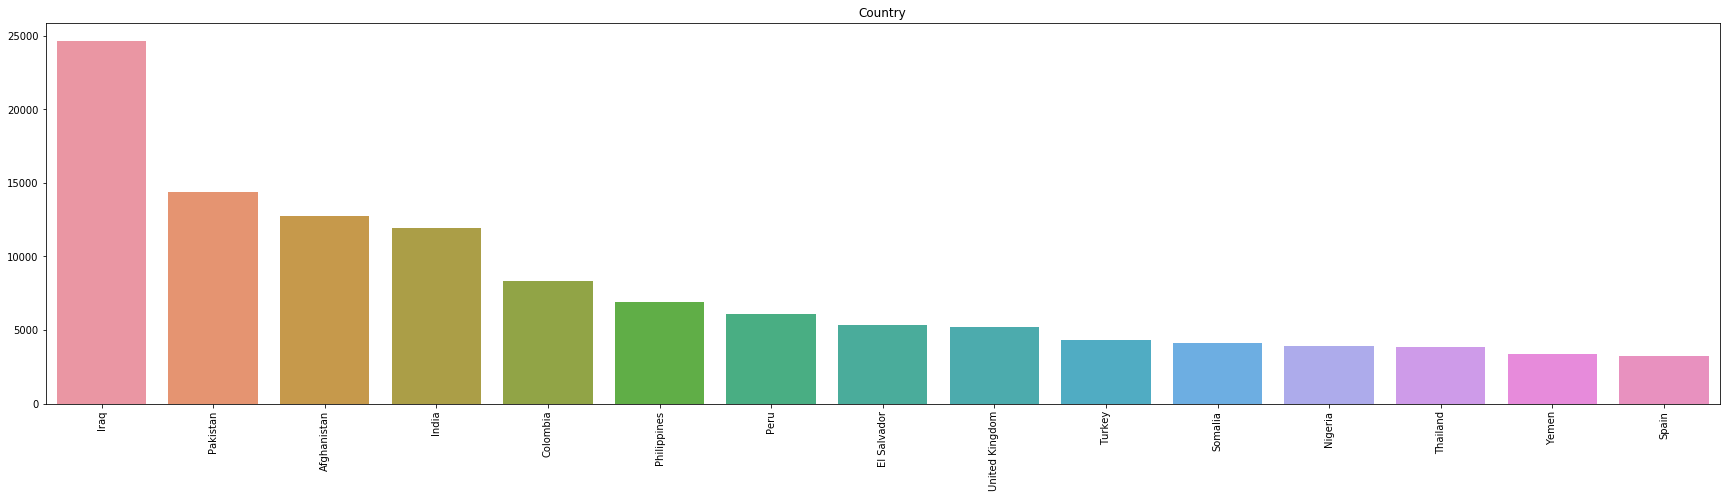

In [209]:
plt.figure(figsize=(30, 7))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values)
plt.xticks(rotation = 90)
plt.title('Country')

Text(0.5, 1.0, 'Attack in region with time')

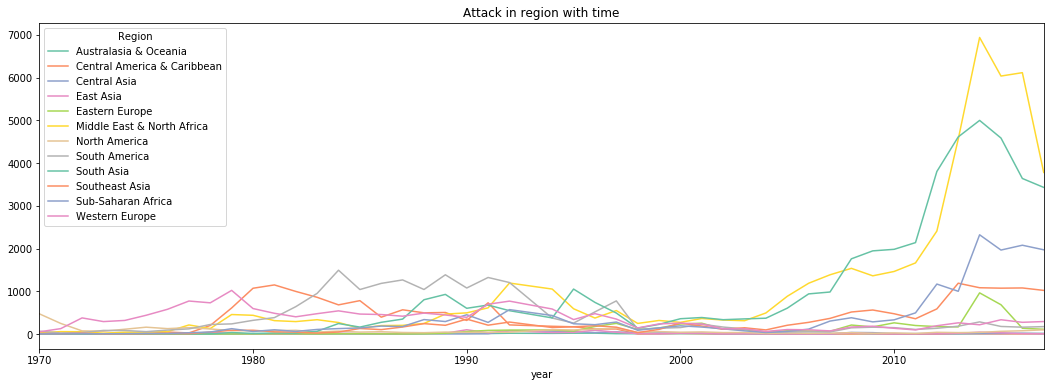

In [178]:

terror_region = pd.crosstab(df.year, df.Region)
terror_region.plot(color=sns.color_palette('Set2',12))

fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attack in region with time')

Text(0.5, 1.0, 'attack type in region')

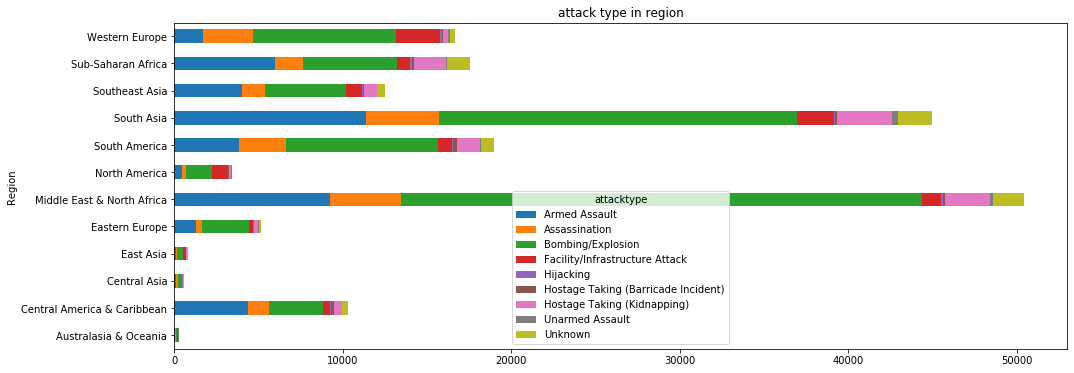

In [186]:
regionvstype = pd.crosstab(df.Region, df.attacktype).plot.barh(stacked=True)
regionvstype.plot()
fig1 = plt.gcf()
fig1.set_size_inches(16, 6)
plt.title('attack type in region')


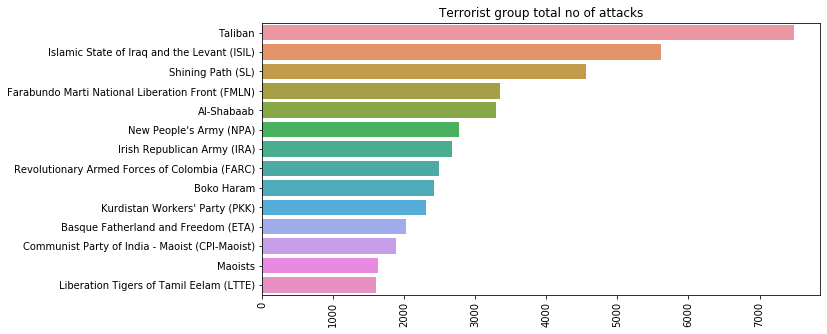

In [219]:
sns.barplot(df['Group'].value_counts()[1:15].values, df['Group'].value_counts()[1:15].index)
plt.xticks(rotation = 90)
plt.title('Terrorist group total no of attacks')
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [245]:
# india terrror 

df_india = df[df['Country'] == 'India']
df_india_cpy = df_india.copy()
df_india_cpy.dropna(subset = ['latitude','longitude'], inplace=True)
location  = df_india_cpy[['latitude','longitude']][:5000]
kill = df_india_cpy['totaldied'][:5000]
city = df_india_cpy['city'][:5000]
wound = df_india_cpy['wounded'][:5000]
targettype = df_india_cpy['Target_type'][:5000]

map1 = folium.Map(location=[20.59, 78.96], zoom_start=4.5)

for points in location.index:
    folium.CircleMarker(list(location.loc[points].values), popup='<br>city<br>'+str(city[points])).add_to(map1)
display(map1)

In [282]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In India '+'\n'+'Year:' +str(Year))
    
    m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
    
    lat_gif=list(df_india[df_india['Year']==Year].latitude)
    long_gif=list(df_india[df_india['Year']==Year].longitude)
    
    x_gif,y_gif=m5(long_gif,lat_gif)
    
    m5.scatter(x_gif, y_gif,s=[killed+wounded for killed,wounded in zip(df_india[df_india['Year']==Year].Killed,df_india[df_india['Year']==Year].Wounded)],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
    
Writer = animation.writers['ffmpeg']  
ani = Writer.FuncAnimation(fig,animate,list(df_india.year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

RuntimeError: Requested MovieWriter (ffmpeg) not available

<Figure size 720x576 with 0 Axes>